**Importing Data sets**

In [77]:
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,models

In [6]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data() #Loading Data from Mnist

**Feature normalisation**

In [14]:
X_train = X_train/255
X_test = X_test/255

**Keras Layers**

In [94]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),strides=(1,1),padding="valid",activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(32,(5,5),strides=(1,1),padding="valid",activation='relu'))
model.add(layers.MaxPool2D(5,5))
model.add(layers.Flatten())
model.add(layers.Dense(60,activation='sigmoid'))
model.add(layers.Dense(10,activation='sigmoid'))

In [95]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 32)          25632     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 60)               

**Loss as Sparse Categorical Cross entropy because output labels are integers from 0 to 9**

In [96]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [97]:
H=model.fit(
    x=X_train,
    y=Y_train,
    batch_size=30,
    epochs=10,
    validation_split=0.3
)

Epoch 1/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.5501 - accuracy: 0.8465 - val_loss: 0.2278 - val_accuracy: 0.9364
Epoch 2/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.1844 - accuracy: 0.9471 - val_loss: 0.1549 - val_accuracy: 0.9534
Epoch 3/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.1351 - accuracy: 0.9600 - val_loss: 0.1268 - val_accuracy: 0.9616
Epoch 4/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.1115 - accuracy: 0.9670 - val_loss: 0.1124 - val_accuracy: 0.9648
Epoch 5/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.0954 - accuracy: 0.9708 - val_loss: 0.1155 - val_accuracy: 0.9657
Epoch 6/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0935 - val_accuracy: 0.9722
Epoch 7/10
1400/1400 [==============================] - 13s 9ms/step - loss: 0.0764 - accuracy: 0.9767 - val_loss: 0.1012 - val_ac

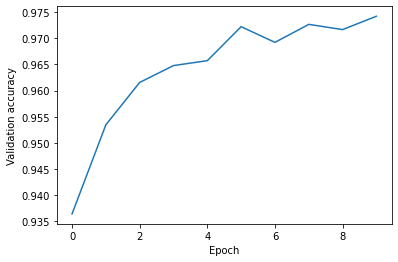

In [107]:
plt.plot(H.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel("Validation accuracy")
plt.show()

In [99]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 1s 6ms/step - loss: 0.0788 - accuracy: 0.9754
test loss, test acc: [0.0787779837846756, 0.9753999710083008]


**Visualize in the test set for first 4**

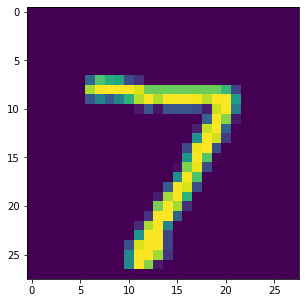

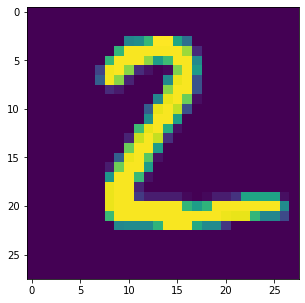

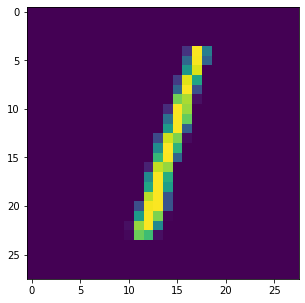

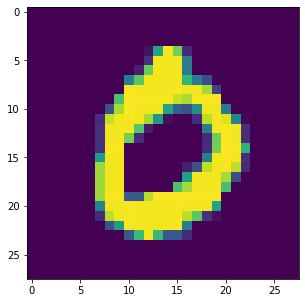

In [100]:
for i in range(len(X_test[:4])):
    plt.figure(figsize=(5,5))
    plt.imshow(X_test[i])

In [104]:
print(np.argmax(model.predict(X_test[:4]),axis=1))

1/1 [==============================] - 0s 16ms/step
[7 2 1 0]


In [105]:
print(Y_test[:4])

[7 2 1 0]
